## Petrol prices analysis
By Celestia Rax
<br>
Date: 09 August 2021

In [33]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df_og = pd.read_excel('PetrolPrices.xlsx')

In [3]:
# view the general outline of the dataframe
print(df_og.shape)
print(df_og.sample(3))
print(df_og.info())

(129, 15)
     Year     Type             Category  January  February    March    April  \
123  2012  IN-LAND         93 LRP (c/l)  1043.00   1077.00  1105.00  1177.00   
88   2015  IN-LAND  Diesel 0.005% (c/l)  1032.49    930.49  1004.49  1129.19   
45   2018  IN-LAND         93 LRP (c/l)  1420.00   1390.00  1354.00  1423.00   

         May     June     July   August  September  October  November  \
123  1205.00  1150.00     1061  1083.00    1176.00  1197.00   1187.00   
88   1124.19  1170.19  1174.19  1100.37    1049.37  1100.37   1090.37   
45   1472.00  1554.00     1580  1581.00    1586.00  1685.00   1685.00   

     December  
123   1178.00  
88    1088.57  
45    1501.00  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       129 non-null    int64  
 1   Type       129 non-null    object 
 2   Category   129 non-null    object 
 3   Ja

<h3>Notes</h3>
<li>We definitely need to check why July is an object, when it is meant to be a float.</li>
<li>Could consider turning the seperate columns of months into two columns one to say the month and one for the price</li>

<h3>Visualization ideas</h3>

<li>Average per month</li>
<li>Average per fuel type(by month and by year)</li>
<li>Comparison of Coastal and In land prices (by year and by fuel type)</li>
<li>Is there a way to forecast future fuel prices?</li>
<li>Detecting anomolies - was there ever a month that the price just seemed way too out there in comparison to the rest of the prices for that fuel type</li>
<li>Basic stuff - like maximum and minimum price per month, also by year and by type</li>

## cleaning

In [4]:
df_new = df_og.copy()

In [5]:
df_new['July'] = df_new.July.astype('float')

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       129 non-null    int64  
 1   Type       129 non-null    object 
 2   Category   129 non-null    object 
 3   January    129 non-null    float64
 4   February   129 non-null    float64
 5   March      129 non-null    float64
 6   April      129 non-null    float64
 7   May        129 non-null    float64
 8   June       129 non-null    float64
 9   July       129 non-null    float64
 10  August     129 non-null    float64
 11  September  116 non-null    float64
 12  October    116 non-null    float64
 13  November   116 non-null    float64
 14  December   115 non-null    float64
dtypes: float64(12), int64(1), object(2)
memory usage: 15.2+ KB


In [27]:
df_new.Type.value_counts()

IN-LAND    69
COASTAL    60
Name: Type, dtype: int64

In [7]:
## now to take all of the month columns into one column
df_s = df_new.stack([0], [3,4,5,6,7,8,9,10,11,12,13,14])

https://stackoverflow.com/questions/23410083/pandas-multiple-columns-into-one-column/48785561#48785561

In [8]:
df_s.head()

0  Year                2021
   Type             COASTAL
   Category    95 LRP (c/l)
   January             1416
   February            1497
dtype: object

<h3>Coastal stacked dataframe</h3>

In [9]:
df_amend = df_new.query('Type == "COASTAL"')
df_amend2 = df_amend.query('Category == "95 ULP (c/l)"')

In [10]:
df_g = df_amend2.groupby(['Year']).mean()

In [11]:
df_try = df_g.stack([0], [3,4,5,6,7,8,9,10,11,12,13,14])

In [12]:
df_try.head(20)

Year           
2012  January      1031.0
      February     1065.0
      March        1093.0
      April        1159.0
      May          1187.0
      June         1132.0
      July         1047.0
      August       1069.0
      September    1162.0
      October      1185.0
      November     1175.0
      December     1166.0
2013  January      1151.0
      February     1192.0
      March        1273.0
      April        1283.0
      May          1210.0
      June         1202.0
      July         1286.0
      August       1318.0
dtype: float64

<h3>Inland stacked dataframe</h3>

In [28]:
df_inl = df_new.query('Type == "IN-LAND"')
df_inl2 = df_inl.query('Category == "95 ULP (c/l)"')

In [29]:
# now group
df_inl3 = df_inl2.groupby(['Year']).mean()
# now stack
df_inl4 = df_inl3.stack([0], [3,4,5,6,7,8,9,10,11,12,13,14])
# print stack
df_inl4.head(15)

Year           
2012  January      1061.0
      February     1095.0
      March        1123.0
      April        1194.0
      May          1222.0
      June         1167.0
      July         1082.0
      August       1104.0
      September    1197.0
      October      1220.0
      November     1210.0
      December     1201.0
2013  January      1186.0
      February     1227.0
      March        1308.0
dtype: float64

## calculated column

In [54]:
## remove NaNs and replace with 0
df_new.replace(np.nan, 0)

## check alles werk nogsteeds
df_new.head(20)

,Year,Type,Category,January,February,March,April,May,June,July,August,September,October,November,December,YearAvg
0,2021,COASTAL,95 LRP (c/l),1416.000,1497.000,1562.000,1660.000,1651.000,1641.000,1667.000,1758.000,NaN,NaN,NaN,NaN,NaN
1,2021,COASTAL,95 ULP (c/l),1416.000,1497.000,1562.000,1660.000,1651.000,1641.000,1667.000,1758.000,NaN,NaN,NaN,NaN,NaN
2,2021,COASTAL,Diesel 0.05% (c/l),1240.120,1298.120,1352.120,1416.120,1385.120,1405.120,1447.120,1502.700,NaN,NaN,NaN,NaN,NaN
3,2021,COASTAL,Diesel 0.005% (c/l),1241.520,1300.520,1356.520,1418.520,1388.520,1409.520,1450.520,1505.100,NaN,NaN,NaN,NaN,NaN
4,2021,COASTAL,Illuminating Paraffin (c/l),658.590,717.590,764.590,798.590,775.590,795.590,831.590,881.590,NaN,NaN,NaN,NaN,NaN
5,2021,COASTAL,Liquefied Petroleum Gas (c/kg),2472.000,2666.000,2752.000,2801.000,2628.000,2486.000,2549.000,2775.000,NaN,NaN,NaN,NaN,NaN
6,2021,IN-LAND,93 LRP (c/l),1469.000,1550.000,1615.000,1710.000,1701.000,1691.000,1720.000,1811.000,NaN,NaN,NaN,NaN,NaN
7,2021,IN-LAND,93 ULP (c/l),1469.000,1550.000,1615.000,1710.000,1701.000,1691.000,1720.000,1811.000,NaN,NaN,NaN,NaN,NaN
8,2021,IN-LAND,95 ULP (c/l),1486.000,1567.000,1632.000,1732.000,1723.000,1713.000,1739.000,1830.000,NaN,NaN,NaN,NaN,NaN
9,2021,IN-LAND,Diesel 0.05% (c/l),1300.420,1358.420,1412.420,1477.620,1446.620,1466.620,1508.620,1564.200,NaN,NaN,NaN,NaN,NaN


In [50]:
# average for whole year
df_new['YearAvg'] = (df_new['January'] + df_new['February'] + df_new['March'] + df_new['April'] + df_new['May'] + 
                     df_new['June'] + df_new['July'] + df_new['August'] + df_new['September'] + df_new['October']
                    + df_new['November'] + df_new['December'])/12

In [56]:
df_new.head()

,Year,Type,Category,January,February,March,April,May,June,July,August,September,October,November,December,YearAvg
0,2021,COASTAL,95 LRP (c/l),1416.00,1497.00,1562.00,1660.00,1651.00,1641.00,1667.00,1758.00,NaN,NaN,NaN,NaN,NaN
1,2021,COASTAL,95 ULP (c/l),1416.00,1497.00,1562.00,1660.00,1651.00,1641.00,1667.00,1758.00,NaN,NaN,NaN,NaN,NaN
2,2021,COASTAL,Diesel 0.05% (c/l),1240.12,1298.12,1352.12,1416.12,1385.12,1405.12,1447.12,1502.70,NaN,NaN,NaN,NaN,NaN
3,2021,COASTAL,Diesel 0.005% (c/l),1241.52,1300.52,1356.52,1418.52,1388.52,1409.52,1450.52,1505.10,NaN,NaN,NaN,NaN,NaN
4,2021,COASTAL,Illuminating Paraffin (c/l),658.59,717.59,764.59,798.59,775.59,795.59,831.59,881.59,NaN,NaN,NaN,NaN,NaN


## Visualization

In [13]:
df_year = df_new.groupby(['Year', 'Type']).mean()

In [14]:
df_year.head(15)

January     February        March        April          May  \
Year Type                                                                       
2012 COASTAL  1128.918000  1147.584667  1166.878000  1219.844667  1238.811333   
     IN-LAND   999.368000  1015.368000  1033.328000  1091.066333  1109.694667   
2013 COASTAL  1222.311333  1258.411333  1334.038000  1325.791333  1259.604667   
     IN-LAND  1260.166857  1296.966857  1373.361143  1369.121143  1301.961143   
2014 COASTAL  1398.054667  1430.121333  1463.688000  1450.454667  1431.694667   
     IN-LAND  1436.918286  1469.975429  1503.889714  1495.875429  1477.652571   
2015 COASTAL  1115.351333  1008.351333  1102.851333  1214.568000  1214.901333   
     IN-LAND  1163.929714  1058.929714  1153.644000  1272.401143  1272.686857   
2016 COASTAL  1137.394667  1108.894667  1073.561333  1159.228000  1160.561333   
     IN-LAND  1198.824000  1175.252571  1135.109714  1223.824000  1226.824000   
2017 COASTAL  1247.541333  1270.541333  1265.541333  1228.141333  1276.308000   
     IN-LAND  1312.235429  1336.092571  1330.664000  1296.592571  1345.021143   
2018 COASTAL  1367.124667  1344.453000  1301.958000  1346.508000  1402.508000   
     IN-LAND  1433.721143  1410.006857  1368.435429  1422.306857  1477.449714   
2019 COASTAL  1348.469667  1348.636333  1433.469667  1538.953000  1571.619667   

                     June         July       August    September      October  \
Year Type                                                                       
2012 COASTAL  1192.204667  1114.678000  1138.218000  1225.884667  1251.771333   
     IN-LAND  1070.421333   996.228000  1014.768000  1096.434667  1125.988000   
2013 COASTAL  1256.611333  1344.678000  1374.164667  1382.938000  1368.271333   
     IN-LAND  1298.252571  1385.738286  1415.584000  1422.389714  1407.246857   
2014 COASTAL  1410.001333  1438.501333  1433.628000  1381.834667  1375.501333   
     IN-LAND  1455.915429  1484.201143  1480.024000  1426.058286  1421.915429   
2015 COASTAL  1270.068000  1295.401333  1226.961333  1158.128000  1186.961333   
     IN-LAND  1326.686857  1355.115429  1289.166857  1220.309714  1243.881143   
2016 COASTAL  1230.061333  1255.728000  1190.894667  1129.061333  1164.394667   
     IN-LAND  1293.681143  1317.681143  1195.966857  1192.395429  1229.109714   
2017 COASTAL  1243.808000  1176.474667  1234.974667  1263.141333  1299.641333   
     IN-LAND  1313.592571  1245.878286  1244.878286  1332.306857  1366.735429   
2018 COASTAL  1495.174667  1521.174667  1523.508000  1525.174667  1647.008000   
     IN-LAND  1568.592571  1594.878286  1597.164000  1599.306857  1717.735714   
2019 COASTAL  1585.673000  1497.246333  1501.316333  1514.983333  1536.316667   

                 November     December  
Year Type                               
2012 COASTAL  1252.338000  1241.004667  
     IN-LAND  1124.663000  1168.060000  
2013 COASTAL  1344.038000  1358.828000  
     IN-LAND  1382.475429  1397.581143  
2014 COASTAL  1314.168000  1244.184667  
     IN-LAND  1362.915429  1293.072571  
2015 COASTAL  1168.294667  1167.061333  
     IN-LAND  1224.738286  1223.824000  
2016 COASTAL  1219.728000  1194.041333  
     IN-LAND  1282.966857  1258.806857  
2017 COASTAL  1315.641333  1402.958000  
     IN-LAND  1381.021143  1467.864000  
2018 COASTAL  1657.981667  1483.610000  
     IN-LAND  1727.141429  1552.680000  
2019 COASTAL  1518.116667  1532.341667

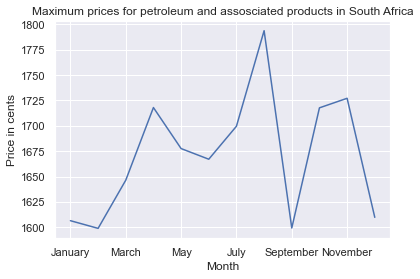

In [34]:
df_year.max().plot()
plt.title('Maximum prices for petroleum and assosciated products in South Africa')
plt.ylabel('Price in cents')
plt.xlabel('Month');

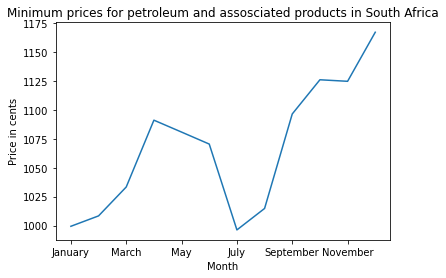

In [16]:
df_year.min().plot()
plt.title('Minimum prices for petroleum and assosciated products in South Africa')
plt.ylabel('Price in cents')
plt.xlabel('Month');

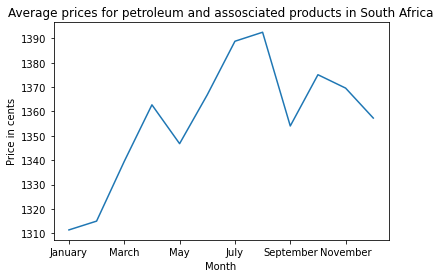

In [17]:
df_year.mean().plot()
plt.title('Average prices for petroleum and assosciated products in South Africa')
plt.ylabel('Price in cents')
plt.xlabel('Month');

In [18]:
coast_d = df_new.query('Type == "COASTAL"')

In [19]:
coast_d.head()

,Year,Type,Category,January,February,March,April,May,June,July,August,September,October,November,December
0,2021,COASTAL,95 LRP (c/l),1416.00,1497.00,1562.00,1660.00,1651.00,1641.00,1667.00,1758.00,NaN,NaN,NaN,NaN
1,2021,COASTAL,95 ULP (c/l),1416.00,1497.00,1562.00,1660.00,1651.00,1641.00,1667.00,1758.00,NaN,NaN,NaN,NaN
2,2021,COASTAL,Diesel 0.05% (c/l),1240.12,1298.12,1352.12,1416.12,1385.12,1405.12,1447.12,1502.70,NaN,NaN,NaN,NaN
3,2021,COASTAL,Diesel 0.005% (c/l),1241.52,1300.52,1356.52,1418.52,1388.52,1409.52,1450.52,1505.10,NaN,NaN,NaN,NaN
4,2021,COASTAL,Illuminating Paraffin (c/l),658.59,717.59,764.59,798.59,775.59,795.59,831.59,881.59,NaN,NaN,NaN,NaN


In [20]:
coast_d_pet = coast_d.query('Category == "95 ULP (c/l)"')

In [21]:
coast_c = coast_d_pet.groupby(['Year']).mean()

In [22]:
coast_c.head()

,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2012,1031.0,1065.0,1093.0,1159.0,1187.0,1132.0,1047.0,1069.0,1162.0,1185.0,1175.0,1166.0
2013,1151.0,1192.0,1273.0,1283.0,1210.0,1202.0,1286.0,1318.0,1313.0,1293.0,1265.0,1282.0
2014,1320.0,1359.0,1395.0,1398.0,1383.0,1361.0,1392.0,1392.0,1325.0,1320.0,1275.0,1206.0
2015,1083.0,990.0,1086.0,1246.0,1246.0,1293.0,1334.0,1283.0,1214.0,1218.0,1196.0,1197.0
2016,1194.0,1200.0,1131.0,1214.0,1226.0,1278.0,1286.0,1187.0,1169.0,1212.0,1257.0,1237.0


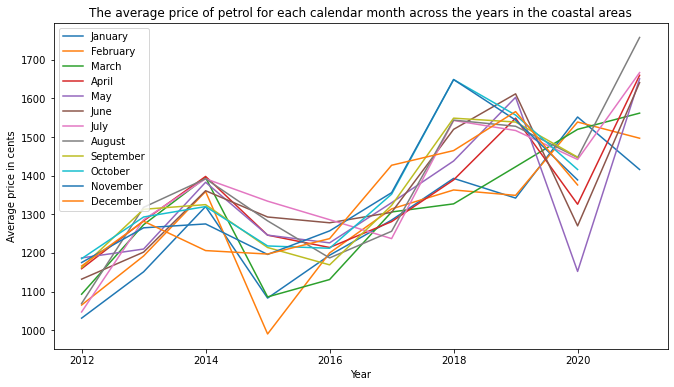

In [23]:
fig, ax = plt.subplots(figsize=(11,6))
coast_c.plot(kind='line', ax=ax)
plt.title('The average price of petrol for each calendar month across the years in the coastal areas')
plt.xlabel('Year')
plt.ylabel('Average price in cents');

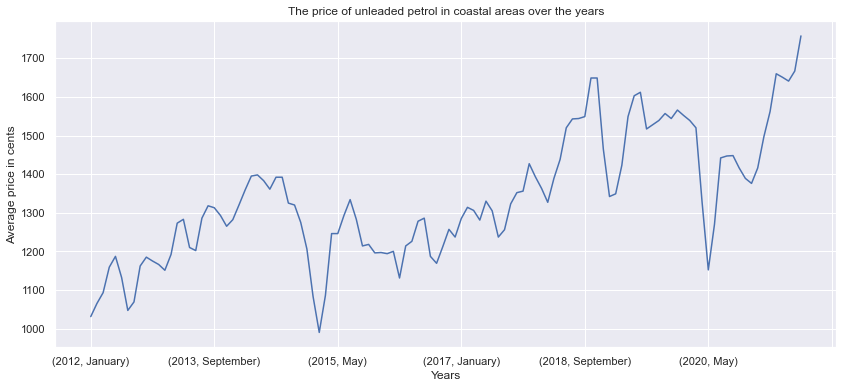

In [36]:
fig, ax = plt.subplots(figsize=(14,6))
df_try.plot(kind='line', ax=ax)
plt.title('The price of unleaded petrol in coastal areas over the years')
plt.xlabel('Years')
plt.ylabel('Average price in cents');

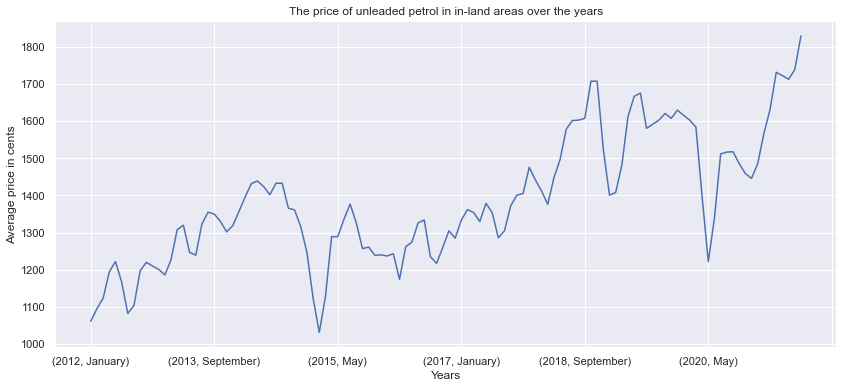

In [35]:
fig, ax = plt.subplots(figsize=(14,6))
df_inl4.plot(kind='line', ax=ax)
plt.title('The price of unleaded petrol in in-land areas over the years')
plt.xlabel('Years')
plt.ylabel('Average price in cents');

## exploring Diesel

In [57]:
# filter for diesel
df_dies = df_new.query('Category == "Diesel 0.05% (c/l)"')
df_dies.head()

,Year,Type,Category,January,February,March,April,May,June,July,August,September,October,November,December,YearAvg
2,2021,COASTAL,Diesel 0.05% (c/l),1240.12,1298.12,1352.12,1416.12,1385.12,1405.12,1447.12,1502.70,NaN,NaN,NaN,NaN,NaN
9,2021,IN-LAND,Diesel 0.05% (c/l),1300.42,1358.42,1412.42,1477.62,1446.62,1466.62,1508.62,1564.20,NaN,NaN,NaN,NaN,NaN
15,2020,COASTAL,Diesel 0.05% (c/l),1408.06,1403.06,1349.06,1209.26,1048.26,1070.26,1243.26,1288.26,1267.26,1177.26,1165.26,1185.12,1234.531667
22,2020,IN-LAND,Diesel 0.05% (c/l),1462.26,1457.26,1403.26,1269.56,1108.56,1130.56,1303.56,1348.56,1327.56,1237.56,1225.56,1245.42,1293.306667
28,2019,COASTAL,Diesel 0.05% (c/l),1264.62,1265.62,1356.62,1432.92,1433.92,1467.08,1392.30,1379.01,1405.01,1430.01,1414.01,1399.06,1386.681667


In [59]:
# filter out 2021
df_dies.query('Year != 2021')

,Year,Type,Category,January,February,March,April,May,June,July,August,September,October,November,December,YearAvg
15,2020,COASTAL,Diesel 0.05% (c/l),1408.06,1403.06,1349.06,1209.26,1048.26,1070.26,1243.26,1288.26,1267.26,1177.26,1165.26,1185.12,1234.531667
22,2020,IN-LAND,Diesel 0.05% (c/l),1462.26,1457.26,1403.26,1269.56,1108.56,1130.56,1303.56,1348.56,1327.56,1237.56,1225.56,1245.42,1293.306667
28,2019,COASTAL,Diesel 0.05% (c/l),1264.62,1265.62,1356.62,1432.92,1433.92,1467.08,1392.30,1379.01,1405.01,1430.01,1414.01,1399.06,1386.681667
35,2019,IN-LAND,Diesel 0.05% (c/l),1313.42,1314.42,1405.42,1487.12,1488.12,1521.28,1446.50,1433.21,1459.21,1484.21,1468.21,1453.26,1439.531667
41,2018,COASTAL,Diesel 0.05% (c/l),1234.93,1217.93,1170.93,1226.03,1285.03,1370.03,1396.03,1392.03,1392.03,1516.03,1563.95,1418.54,1348.624167
48,2018,IN-LAND,Diesel 0.05% (c/l),1273.63,1256.63,1209.63,1274.83,1333.83,1418.83,1444.83,1440.83,1440.83,1564.83,1612.75,1467.34,1394.899167
54,2017,COASTAL,Diesel 0.05% (c/l),1103.43,1124.43,1122.43,1111.63,1141.63,1118.63,1058.63,1087.63,1131.63,1173.63,1196.63,1256.93,1135.605000
61,2017,IN-LAND,Diesel 0.05% (c/l),1141.83,1162.83,1160.83,1150.33,1180.33,1157.33,1097.33,1126.33,1170.33,1212.33,1235.33,1295.63,1174.230000
67,2016,COASTAL,Diesel 0.05% (c/l),972.47,910.47,925.47,1015.47,1014.47,1090.47,1132.47,1058.47,1010.47,1033.47,1096.47,1064.43,1027.050000
74,2016,IN-LAND,Diesel 0.05% (c/l),1005.17,943.17,958.17,1053.87,1052.87,1128.87,1170.87,1096.87,1048.87,1071.87,1134.87,1102.83,1064.025000


Type
COASTAL    AxesSubplot(0.125,0.125;0.775x0.755)
IN-LAND    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

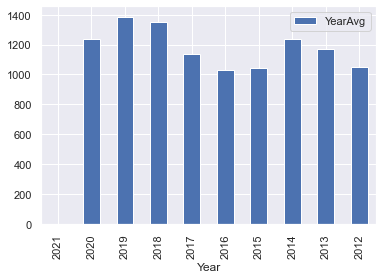

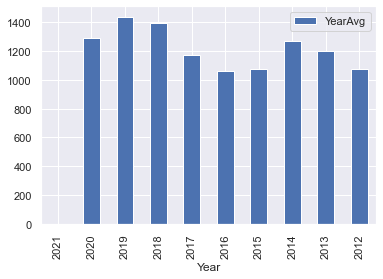

In [60]:
dies_2 = df_dies.groupby('Type')


f.set_figheight(15)
f.set_figwidth(15)
dies_2.plot(x="Year", y=["YearAvg"], kind="bar")

https://www.geeksforgeeks.org/plot-multiple-columns-of-pandas-dataframe-on-bar-chart-with-matplotlib/

Diesel is slightly more expensive in the in-land provinces, than by the coast. It mirrors the petrol prices in that it also had a reduction in price around 2016 but rose again towards 2019.